# Customer Churn Analysis

## Data Description

   Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


   Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.


   Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 


   The dataset contains the data of the customer.on the basis of data we have to predict customer "Churn".The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges'and 'Churn'.

   Our target is to predict the 'Churn'(Attrition of customer).

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


## Loading the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Dimension of the dataset
df.shape

(7043, 21)

In [4]:
#Statistical history
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
#Checking the  null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that the column "Totalcharges" has continuous data but it is an object type.Let us handle this column.

## EDA

In [9]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df.loc[df['TotalCharges']==" "] #checking null values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

So it is clear that the column TotalCharges contains 11 Nan values.

In [13]:
# converting the column Totalcharges from object type to float
df['TotalCharges']=df['TotalCharges'].astype(float)

Now we are going to replace the nan values using median since this column is continuous in nature.

In [14]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
df['TotalCharges']=imp.fit_transform(df['TotalCharges'].values.reshape(-1,1))

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So we have replaced all null values.

In [16]:
# Now we are going to make a dataframe for nominal data

df_nominal=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
              'PaymentMethod','Churn']].copy()

In [17]:
df_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Data Visualization

Male      3555
Female    3488
Name: gender, dtype: int64


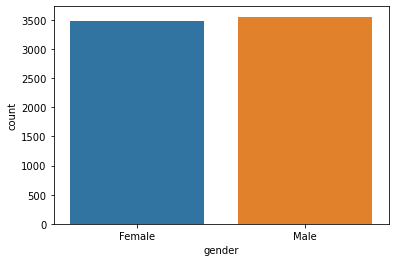

In [18]:
# Univariate Analysis
ax=sns.countplot(x='gender',data=df_nominal)
print(df_nominal['gender'].value_counts())

* We can observe that the number of male is 3555 and the number of female customer is 3488.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


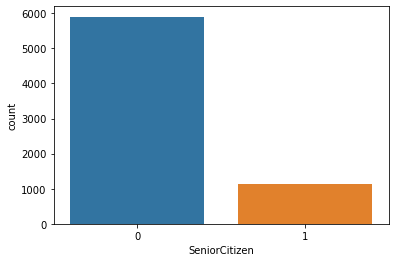

In [19]:
ax=sns.countplot(x='SeniorCitizen',data=df_nominal)
print(df_nominal['SeniorCitizen'].value_counts())

* From the above we can observe that the number of younger customers are 5901.and the number of senior citizen customers are 1142.

No     3641
Yes    3402
Name: Partner, dtype: int64


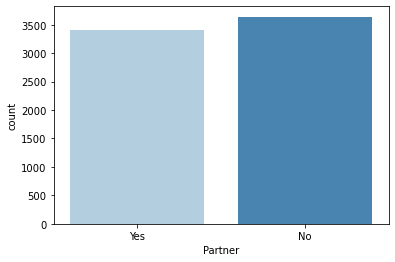

In [20]:
ax=sns.countplot(x='Partner',data=df_nominal,palette='Blues')
print(df_nominal['Partner'].value_counts())

* From this plot it is clear that the number of non married customers are 3641 and non married customers are 3402.

No     4933
Yes    2110
Name: Dependents, dtype: int64


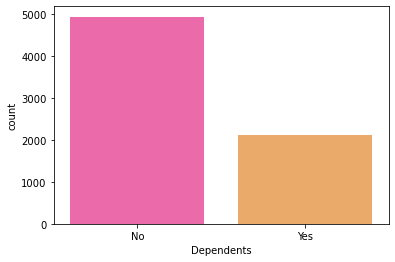

In [21]:
ax=sns.countplot(x='Dependents',data=df_nominal,palette='spring')
print(df_nominal['Dependents'].value_counts())

* From this plot it is clear that most of the customers are independent whose number is 4933.dependent customers are less in number.

Yes    6361
No      682
Name: PhoneService, dtype: int64


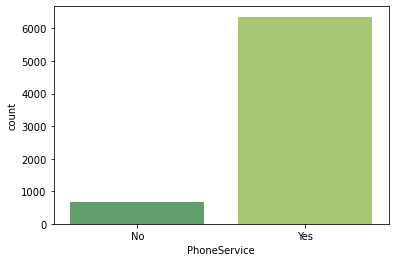

In [22]:
ax=sns.countplot(x='PhoneService',data=df_nominal,palette='summer')
print(df_nominal['PhoneService'].value_counts())

* Most of the customers have phoneservice whose count is 6361.only 682 customers don't have phone service.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


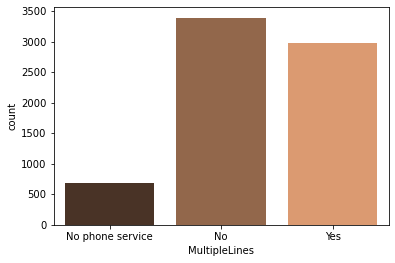

In [23]:
ax=sns.countplot(x='MultipleLines',data=df_nominal,palette='copper')
print(df_nominal['MultipleLines'].value_counts())

* Most of the customers don't have multiple lines.their count is 3390.2971 customers have multiple lines and 682 customers have no phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


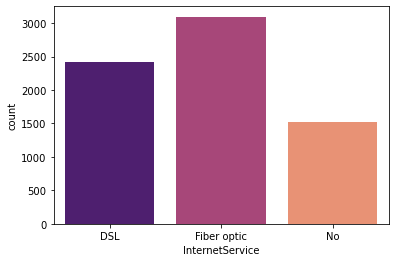

In [24]:
ax=sns.countplot(x='InternetService',data=df_nominal,palette='magma')
print(df_nominal['InternetService'].value_counts())

* The customers who have fiber optic internet service is 3096 which is maximum.1526 customers have no internet service.Second most customers (2421)have DSL.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


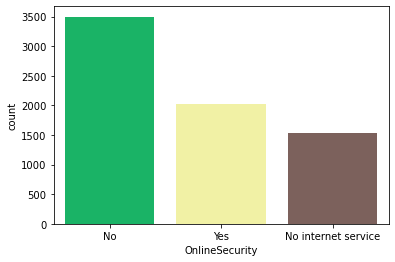

In [25]:
ax=sns.countplot(x='OnlineSecurity',data=df_nominal,palette='terrain')
print(df_nominal['OnlineSecurity'].value_counts())

* 3498 customers have no online security.second most people have security. 1526 customers have no internet service

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


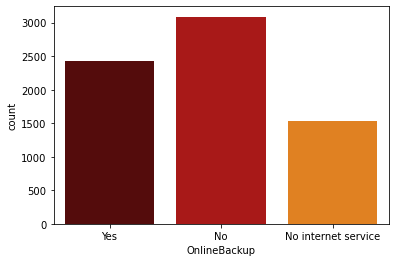

In [26]:
ax=sns.countplot(x='OnlineBackup',data=df_nominal,palette='gist_heat')
print(df_nominal['OnlineBackup'].value_counts())

* Most of the customers have no online backup and their count is 3088.2429 customers have online back up.1526 customers have no internet service.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


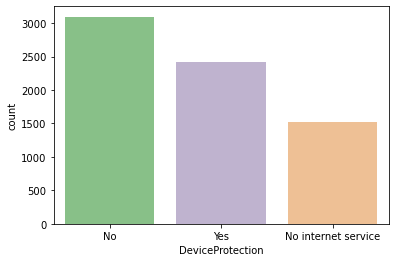

In [27]:
ax=sns.countplot(x='DeviceProtection',data=df_nominal,palette='Accent')
print(df_nominal['DeviceProtection'].value_counts())

* Most of the customers have no device protection.Second most customers that is 2422 customers have device protection.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


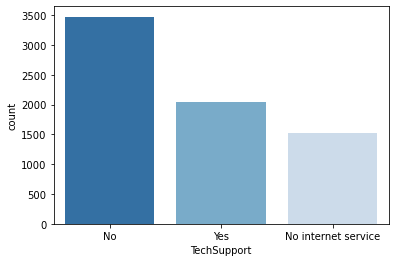

In [28]:
ax=sns.countplot(x='TechSupport',data=df_nominal,palette='Blues_r')
print(df_nominal['TechSupport'].value_counts())

* Most of the customers are not getting no Techsupport.2044 customers are getting tech support.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


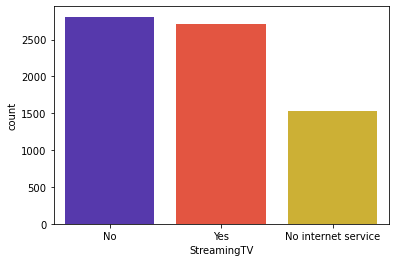

In [29]:
ax=sns.countplot(x='StreamingTV',data=df_nominal,palette='CMRmap')
print(df_nominal['StreamingTV'].value_counts())

* 2810 customers are not sreaning TV.2707 customers are streaming TV.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


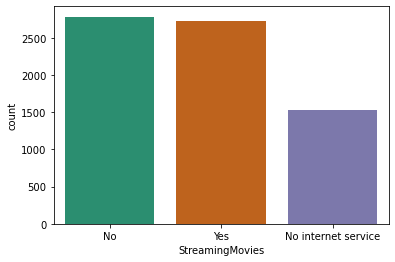

In [30]:
ax=sns.countplot(x='StreamingMovies',data=df_nominal,palette='Dark2')
print(df_nominal['StreamingMovies'].value_counts())

* 2785 customers are not streaming TV.2732 customers are streaming TV.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


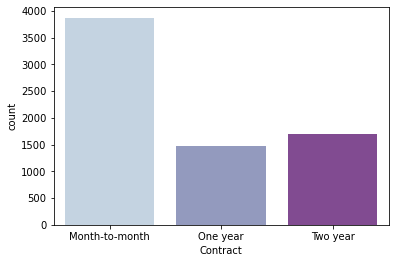

In [31]:
ax=sns.countplot(x='Contract',data=df_nominal,palette='BuPu')
print(df_nominal['Contract'].value_counts())

* Most of the customers have month to month contract with the telecom company.second most customers have 2 year contract with the company.1473 customers have one year contract with the company.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


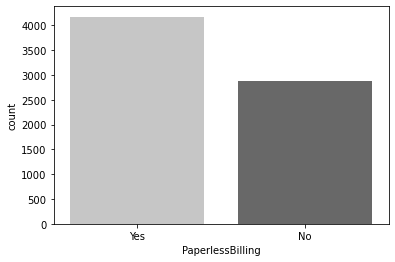

In [32]:
ax=sns.countplot(x='PaperlessBilling',data=df_nominal,palette='Greys')
print(df_nominal['PaperlessBilling'].value_counts())

* Most of the customers have paperlessBilling.2872 customes have paper billing.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


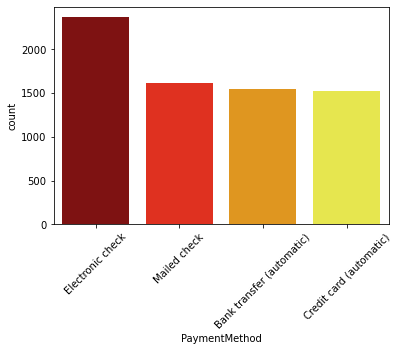

In [33]:
plt.xticks(rotation=45)
ax=sns.countplot(x='PaymentMethod',data=df_nominal,palette='hot')
print(df_nominal['PaymentMethod'].value_counts())

* Most of the customers prefers payment method electronic check.
  1612 customers prefers Mailed check.
  and 1544 and 1522 customers are using payment methods Bank transfer and Credit card respectively


No     5174
Yes    1869
Name: Churn, dtype: int64


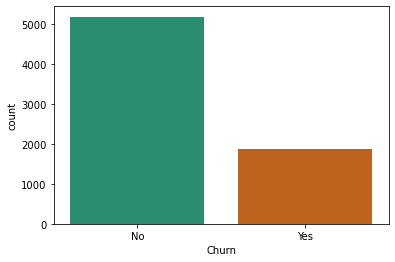

In [34]:
ax=sns.countplot(x='Churn',data=df_nominal,palette='Dark2')
print(df_nominal['Churn'].value_counts())

* Most of the customers didn't leave the company.1869 customers left the telecom company.

In [35]:
# Making dataframe for the ordinal data
df_ordinal=df[['customerID','tenure']].copy()

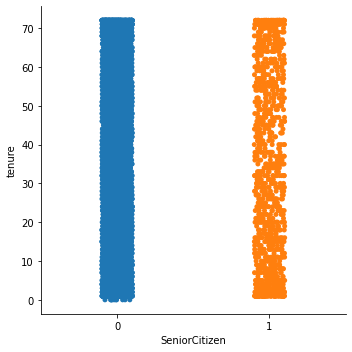

In [36]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df)
plt.show()

* Tenure is almost same for senior citizen and younger customers.

In [37]:
df_continuous=df[['MonthlyCharges','TotalCharges']].copy()

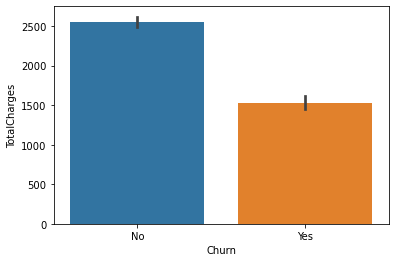

In [38]:
sns.barplot(x='Churn',y='TotalCharges',data=df)
plt.show()

* Customers who left the company have less total charges.So Total charges does not reflect churn.

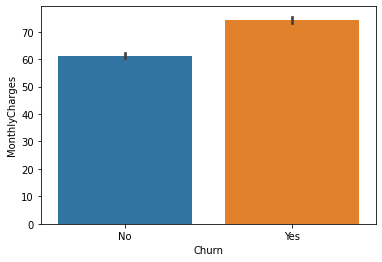

In [39]:
sns.barplot(x='Churn',y='MonthlyCharges',data=df)
plt.show()

* Most of the customers whose monthly charges are above 70 left the company.

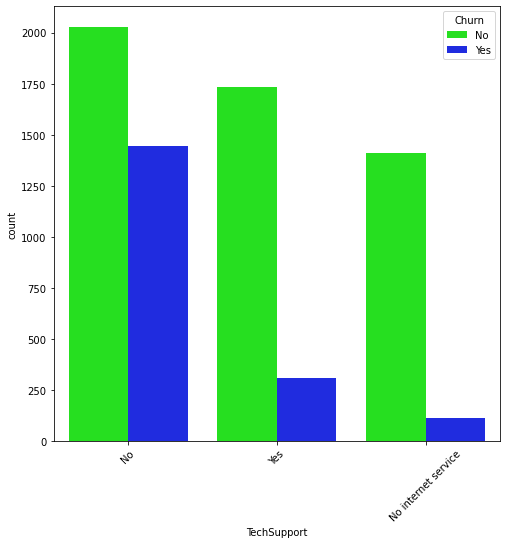

In [40]:
# Bivariate analysis
plt.figure(figsize=(8,8))
ax=sns.countplot(x='TechSupport',hue='Churn',data=df,palette='hsv')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

* Churn is maximum for the customers who are not getting techsupport

* The customers who left the company even after techsupport is less in number

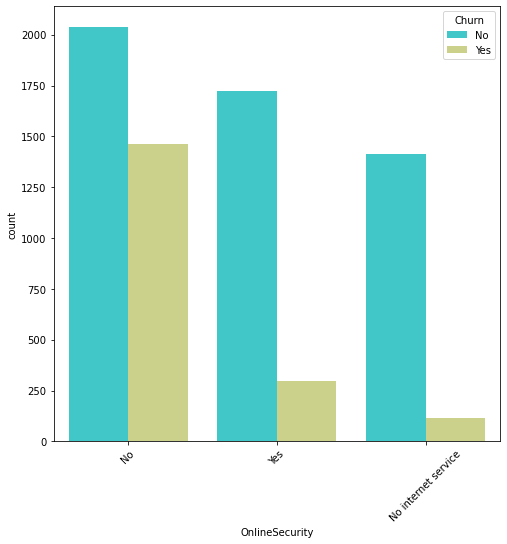

In [41]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=df,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

* The customers who have no online security left maximum compared to others.

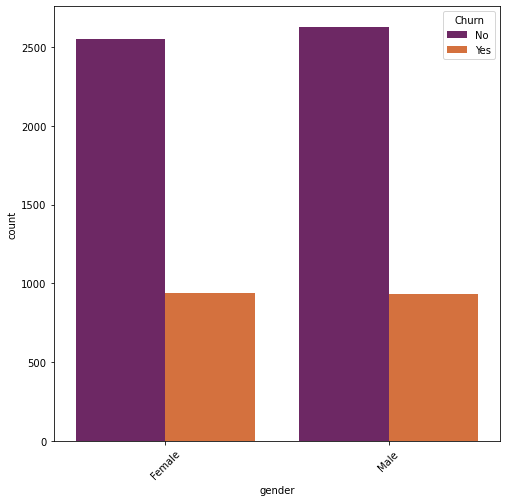

In [42]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='gender',hue='Churn',data=df,palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

* gender doesn't reflect churn.

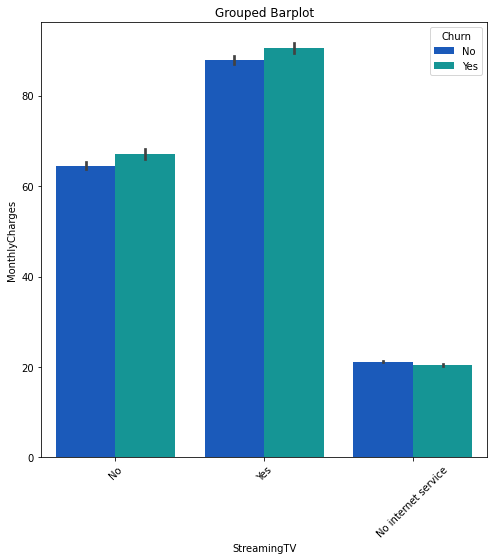

In [43]:
plt.figure(figsize=(8,8))
plt.title('Grouped Barplot')
ax=sns.barplot(x='StreamingTV',y='MonthlyCharges',hue='Churn',data=df,palette='winter')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

* Customers who are streamimg Tv and their Charges are high left the company more than other customers.

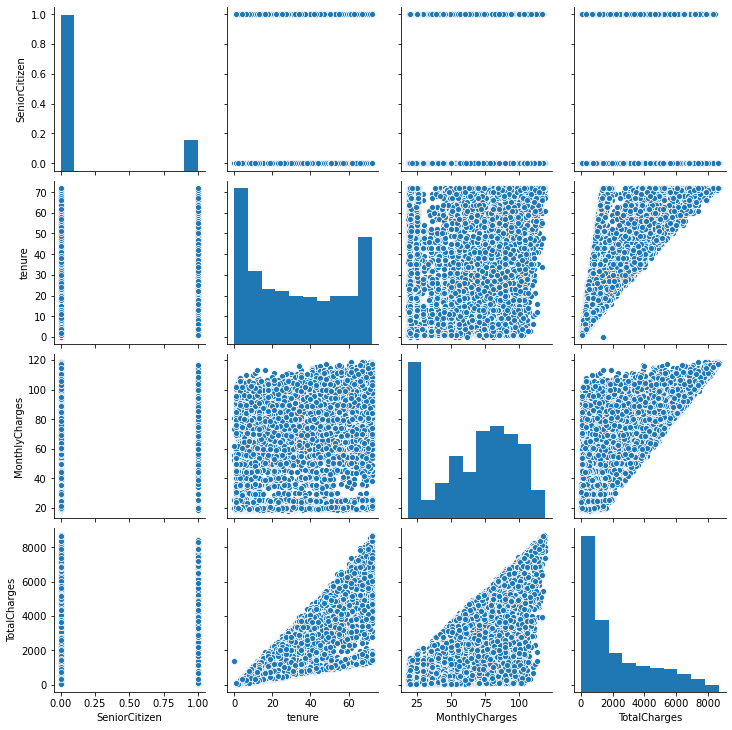

In [44]:
#Multivariate Analysis
sns.pairplot(df)

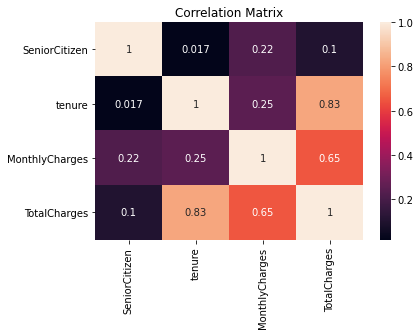

In [45]:
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

* There is strong correlation between tenure,MonthlyCharges and TotalCharges

## Distribution of continuous data

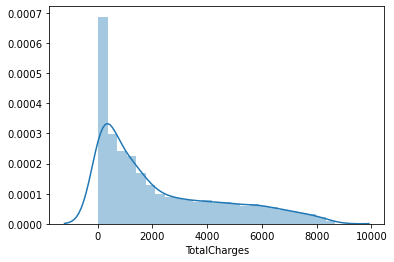

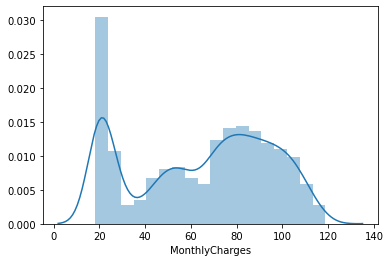

In [46]:
for i in ['TotalCharges','MonthlyCharges']:
    sns.distplot(df_continuous[i],kde=True)
    plt.show()

## Checking Outliers

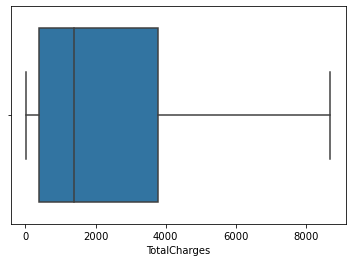

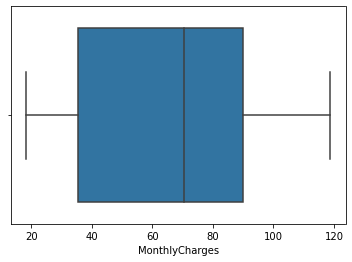

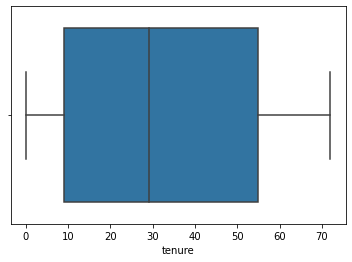

In [47]:
for i in ['TotalCharges','MonthlyCharges','tenure']:
    sns.boxplot(df[i])
    plt.show()

There are no outliers in the dataset.

### Converting Categorical features to Numerical

In [48]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [49]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Now we are going to drop column customerID since this is not so important for further analysis.

In [50]:
df.drop('customerID',axis=1,inplace=True)

In [51]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [52]:
#description of the updated dataset
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


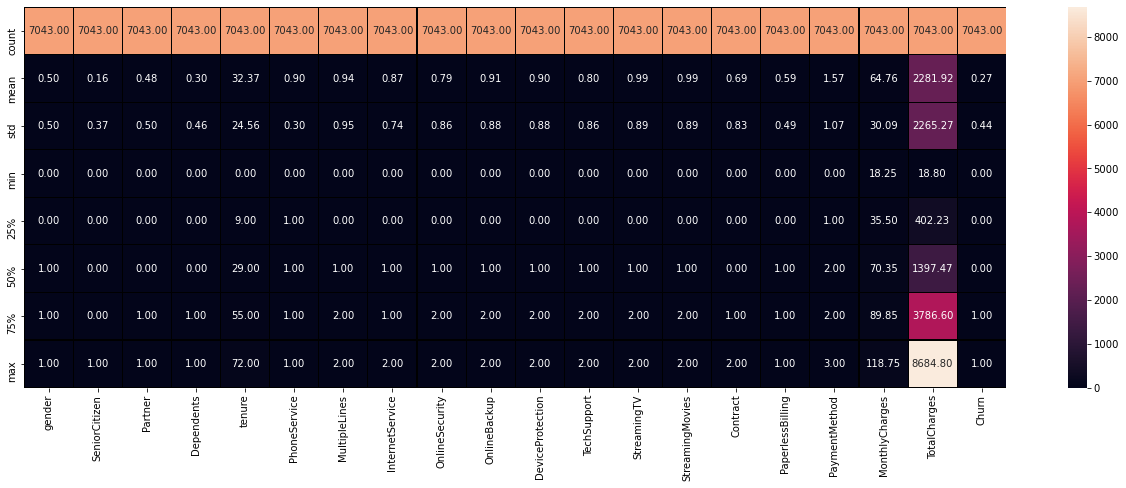

In [53]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")
plt.show()

### Checking the correlation of columns with the target variable

In [54]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


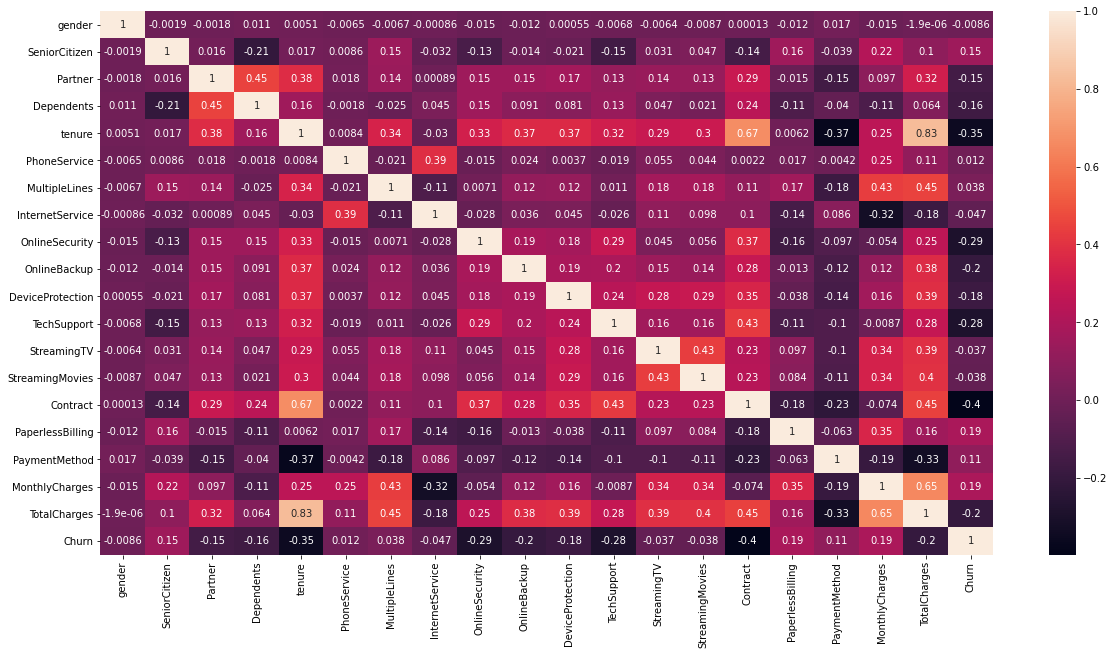

In [55]:
#Multivariate Analysis
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Observations:

* tenure is highly correlated with TotalCharges,contract and good correlation with OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport


* Contract have strong correlation with tenure,OnlineSecurity,TechSupport,DeviceProtection


* The target variable churn is correlated with PaperlessBilling,PaymentMethod,SeniorCitizen and MonyhlyCharges

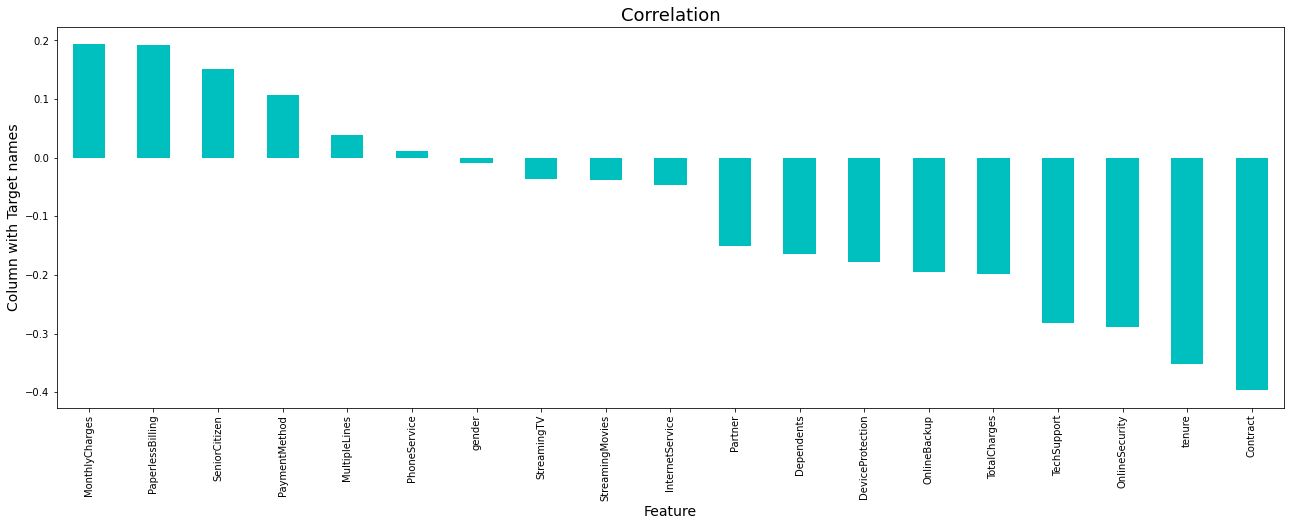

In [56]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='C')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [58]:
#Seperating independent and target variable in x and y
x=df.drop('Churn',axis=1)
y=df['Churn']

## Checking Skewness

In [59]:
x.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
dtype: float64

Keeping +/-0.5 as the range for skewness.here are the columns which doesn't  lie within the range.

* SeniorCitizen-Categorical


* Dependents-Categorical


* PhoneService-Categorical


* TotalCharges-Numerical


Skewness is not present in the categorical variable.so only the variable TotalCharges is skewed.

### Removing Skewness

In [60]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [61]:
df_new.skew()

SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144337
dtype: float64

So we removed the skewness of the column TotalCharges

In [62]:
x=df_new

In [63]:
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.439916,1.034530,-0.654012,-1.644343,-3.054010,0.334585,-1.252568,-0.977199,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.158541,-1.811104
1,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,0.254277
2,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.387090
3,-0.439916,-0.966622,-0.654012,0.646327,-3.054010,0.334585,-1.252568,1.258702,-1.078800,1.163539,1.252625,-1.151526,-1.158239,0.790424,-1.205113,-1.489837,-0.731079,0.233221
4,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.249770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.439916,1.034530,1.529024,-0.078084,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,0.671510,0.296643
7039,-0.439916,1.034530,1.529024,1.342198,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.260981,1.567315
7040,-0.439916,1.034530,1.529024,-0.725121,-3.054010,0.334585,-1.252568,1.258702,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.167241,-0.859191
7041,2.273159,1.034530,-0.654012,-1.265130,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,0.334312,-0.922307


## Scaling the dataset using StandardScaler

In [64]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [65]:
x

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.40968472,
        -1.1585412 , -1.81110363],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.23949171,  0.25427709],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.31889872,
        -0.34266505, -1.38708992],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.40968472,
        -1.16724064, -0.85919134],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  1.31889872,
         0.33431207, -0.92230692],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.48983732,
         1.33886338,  1.48473539]])

## Finding the Best Random State

In [68]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.8325053229240597 on Random_state 483


## Train-Test Split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=483)

In [70]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5634, 18), (1409, 18), (5634,), (1409,))

In [71]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('------------------------------------------')
    print('Accuracy Score')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix')
    print(confusion_matrix(y_test,predm))
    print('Classification Report')
    print(classification_report(y_test,predm))
    print('\n')

For LogisticRegression() :
------------------------------------------
Accuracy Score
0.8325053229240597
Confusion matrix
[[963  71]
 [165 210]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      1034
         1.0       0.75      0.56      0.64       375

    accuracy                           0.83      1409
   macro avg       0.80      0.75      0.77      1409
weighted avg       0.83      0.83      0.82      1409



For GaussianNB() :
------------------------------------------
Accuracy Score
0.7785663591199432
Confusion matrix
[[815 219]
 [ 93 282]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      1034
         1.0       0.56      0.75      0.64       375

    accuracy                           0.78      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.78      0.79      1409



For SVC() :
------

## Cross Validation

In [72]:
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

Cross validation score of LogisticRegression() is:
Score [0.80766501 0.81192335 0.79843861 0.81178977 0.80397727]
Cross validation score 0.8067588029872894
Standard deviation 0.005094447038140019


Cross validation score of GaussianNB() is:
Score [0.75727466 0.76650106 0.74804826 0.76278409 0.75710227]
Cross validation score 0.7583420704561584
Standard deviation 0.006244032313928559


Cross validation score of SVC() is:
Score [0.79418027 0.80411639 0.78708304 0.8046875  0.80894886]
Cross validation score 0.7998032131105233
Standard deviation 0.007994036200294081


Cross validation score of DecisionTreeClassifier() is:
Score [0.74804826 0.72959546 0.72107878 0.71306818 0.74147727]
Cross validation score 0.7306535905542292
Standard deviation 0.012820061765134798


Cross validation score of RandomForestClassifier() is:
Score [0.79276082 0.79347055 0.77146913 0.78835227 0.79758523]
Cross validation score 0.788727599361249
Standard deviation 0.009112801454597053


Cross validation score of 

Since the difference between the accuracy score and cross validation score is minimum for Gradient Boosting Classifier.we consider this model as our best model.

## AUC-ROC Curve

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

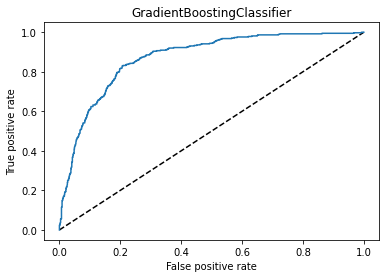

auc score 0.7262823984526112


In [75]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score=roc_auc_score(y_test,gb.predict(x_test)) 
print("auc score",auc_score)

## Hyper parameter Tuning

In [76]:
# Creating parameter list to pass in gridsearchCV
parameters={'criterion':['mse','mae'],'max_depth':[1,10],'n_estimators':[1,100],'max_features':['auto','sqrt','log2']}

In [77]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [80]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [81]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'log2',
 'n_estimators': 100}

In [82]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [83]:
accuracy_score(y_test,GCV_pred)

0.8218594748048261

## Saving the Best Model

In [84]:
import pickle
filename='Customerchurn.pkl'
pickle.dump(GCV.best_estimator_,open('Customerchurn.pkl','wb'))

## Conclusion

In [85]:
loaded_model=pickle.load(open('Customerchurn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8218594748048261


In [86]:
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [87]:
df_con

,Original,Predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1404,0.0,0.0
1405,0.0,0.0
1406,0.0,0.0
1407,0.0,0.0
